In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns                                     # density plots
import matplotlib.pyplot as plt                           # general plotting
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
input_data = pd.read_csv('Processed_Assen_RS_data.csv')

size = (172, 284)

In [3]:
input_data

,Unnamed: 0,Longitude,Latitude,Band1,Band2,Band3,Band4,Band5,Band6,Band7
0,0,27.564250,-25.105965,188,227,363,406,750,709,440
1,1,27.564548,-25.105963,126,144,215,166,917,479,232
2,2,27.564845,-25.105962,141,187,421,310,2263,947,438
3,3,27.565143,-25.105961,111,170,402,291,2558,1154,562
4,4,27.565440,-25.105960,232,365,658,779,2409,2199,1319
...,...,...,...,...,...,...,...,...,...,...
48843,48843,27.647507,-25.151951,381,449,677,884,1931,2451,1749
48844,48844,27.647804,-25.151950,408,483,720,996,1840,2544,2068
48845,48845,27.648102,-25.151949,364,414,584,796,1464,2274,2039
48846,48846,27.648399,-25.151947,387,415,565,745,1389,2199,1867


In [4]:
#lists of similar types of metadata to make referencing the data easier
coord_names = ['Longitude', 'Latitude'] 
bands = ['Band1', 'Band2','Band3', 'Band4', 'Band5', 'Band6', 'Band7']


input_data['Latitude'] = pd.to_numeric(input_data['Latitude'], errors='coerce') #convert latitude to numeric values
input_data['Longitude'] = pd.to_numeric(input_data['Longitude'], errors='coerce') #convert longitude to numeric values



for band in bands:
    input_data[band] = np.abs(pd.to_numeric(input_data[band], errors='coerce')) #make all chemical composition to be numeric

    
input_data.describe() #print cleaned combined df

,Unnamed: 0,Longitude,Latitude,Band1,Band2,Band3,Band4,Band5,Band6,Band7
count,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000
mean,24423.500000,27.606466,-25.128960,251.722547,316.526327,509.547433,609.615419,1648.147539,1801.414490,1216.814609
std,14101.347312,0.024398,0.013452,94.493587,106.311331,145.656643,238.682890,446.999961,469.584012,432.462650
min,0.000000,27.564250,-25.152291,0.000000,62.000000,149.000000,121.000000,150.000000,141.000000,102.000000
25%,12211.750000,27.585356,-25.140607,186.000000,248.000000,436.000000,467.000000,1382.000000,1539.000000,937.750000
50%,24423.500000,27.606466,-25.128958,245.000000,312.000000,498.000000,577.000000,1585.000000,1830.000000,1196.000000
75%,36635.250000,27.627580,-25.117309,312.000000,377.000000,562.000000,706.000000,1865.000000,2070.000000,1454.000000
max,48847.000000,27.648697,-25.105620,968.000000,1171.000000,1834.000000,2558.000000,5025.000000,4031.000000,3158.000000


In [5]:
r = input_data['Band4']
g = input_data['Band3']
b = input_data['Band2']
B1 = input_data['Band1']
nir = input_data['Band5']
SWIR1 = input_data['Band6']
SWIR2 = input_data['Band7']


ferrous_minerals_ratio = (SWIR1/nir).values.reshape((172, 284))#High values in band ratio 4/2 are useful to detect the charge transfer absorption related to ferric iron oxides
ferric_iron_oxide = ((r+SWIR1)/nir).values.reshape((172, 284)) # are useful to detect the crystal-field absorption of ferric iron oxide 
clay_minerals_ratio = (SWIR1/SWIR2).values.reshape((172, 284))



#False color Composite (FCC) 753
ndvi = (nir.astype(float)-r.astype(float))/(nir+r) #Normalized Difference Vegetation Index (NDVI)
ndvi = ndvi.values.reshape((172, 284))
ndwi = (nir.astype(float)-g.astype(float))/(nir+g) #Normalized Difference Water Index (NDWI)
ndwi = ndwi.values.reshape((172, 284))
B42  = r/b
B42.values.reshape((172, 284))
B57  = nir/SWIR1 # this should be nir/SWIR2
B57.values.reshape((172, 284))
B54 = nir/r
B54.values.reshape((172, 284))
#Landsat 8 image ratios (4/2, 5/7, 5/4) in RGB recognized the distribution of iron ore (red-yellow color range)


#543 distinguish vegitation
#764 urban area
#Bathymetric (4, 3, 1)
#Geology (7, 6, 2)
#Agriculture (6, 5, 2)
#Short-Wave Infrared (7, 6 4)
#Color Infrared (5, 4, 3)
#Natural Color (4, 3, 2)




'''B1 = "Band 1", 
   B2 = "Blue", 
   B3 = "Green", 
   B4 = "Red",
   B5 = "NIR", 
   B6 = "SWIR1", 
   B7 = "SWIR2"]

'''

'B1 = "Band 1", \n   B2 = "Blue", \n   B3 = "Green", \n   B4 = "Red",\n   B5 = "NIR", \n   B6 = "SWIR1", \n   B7 = "SWIR2"]\n\n'

In [6]:
features = input_data[bands].copy()

for name in bands:
    features[name] = pd.to_numeric(features[name], errors='coerce')
    
features.fillna(0, inplace=True) 

features.head(10)

,Band1,Band2,Band3,Band4,Band5,Band6,Band7
0,188,227,363,406,750,709,440
1,126,144,215,166,917,479,232
2,141,187,421,310,2263,947,438
3,111,170,402,291,2558,1154,562
4,232,365,658,779,2409,2199,1319
5,257,395,675,927,1785,2221,1413
6,278,445,735,1015,1865,2363,1528
7,284,448,742,1043,1817,2382,1576
8,259,428,726,997,1835,2347,1555
9,285,464,755,1052,1892,2409,1536


In [7]:
%%time

scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features[bands])

features_scaled = pd.DataFrame(features_scaled,columns=features[bands].columns, index=features.index)
features_scaled

CPU times: total: 46.9 ms
Wall time: 18.6 ms


,Band1,Band2,Band3,Band4,Band5,Band6,Band7
0,0.194215,0.148783,0.127003,0.116947,0.123077,0.146015,0.110602
1,0.130165,0.073940,0.039169,0.018465,0.157333,0.086889,0.042539
2,0.145661,0.112714,0.161424,0.077554,0.433436,0.207198,0.109948
3,0.114669,0.097385,0.150148,0.069758,0.493949,0.260411,0.150524
4,0.239669,0.273219,0.302077,0.270004,0.463385,0.529049,0.398233
...,...,...,...,...,...,...,...
48843,0.393595,0.348963,0.313353,0.313090,0.365333,0.593830,0.538940
48844,0.421488,0.379621,0.338872,0.359048,0.346667,0.617738,0.643325
48845,0.376033,0.317403,0.258160,0.276980,0.269538,0.548329,0.633835
48846,0.399793,0.318305,0.246884,0.256053,0.254154,0.529049,0.577552


In [8]:
X = features_scaled
X

,Band1,Band2,Band3,Band4,Band5,Band6,Band7
0,0.194215,0.148783,0.127003,0.116947,0.123077,0.146015,0.110602
1,0.130165,0.073940,0.039169,0.018465,0.157333,0.086889,0.042539
2,0.145661,0.112714,0.161424,0.077554,0.433436,0.207198,0.109948
3,0.114669,0.097385,0.150148,0.069758,0.493949,0.260411,0.150524
4,0.239669,0.273219,0.302077,0.270004,0.463385,0.529049,0.398233
...,...,...,...,...,...,...,...
48843,0.393595,0.348963,0.313353,0.313090,0.365333,0.593830,0.538940
48844,0.421488,0.379621,0.338872,0.359048,0.346667,0.617738,0.643325
48845,0.376033,0.317403,0.258160,0.276980,0.269538,0.548329,0.633835
48846,0.399793,0.318305,0.246884,0.256053,0.254154,0.529049,0.577552


# PCA

In [9]:
#Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None, svd_solver = 'full')

In [10]:
x_pca = pca.fit(X)

In [11]:
x_pca.explained_variance_ratio_

array([0.83127504, 0.10996043, 0.02933562, 0.01812405, 0.0090623 ,
       0.0013634 , 0.00087916])

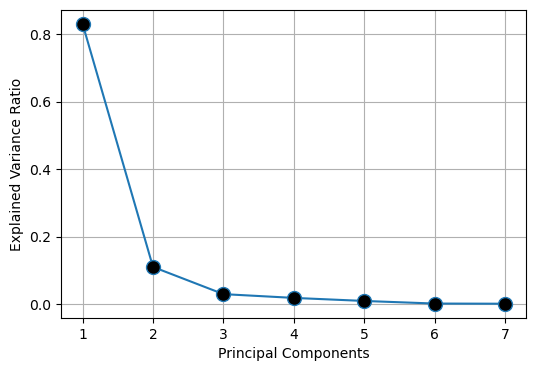

In [12]:
#visualize the variance ratios using a scatter plot

x = [pc+1 for pc in range(len(x_pca.explained_variance_ratio_))]
y = x_pca.explained_variance_ratio_

plt.figure(figsize=(6,4))
plt.plot(x, y, markersize = 10, marker = 'o', markerfacecolor = 'k')


plt.grid(True)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")

plt.show()

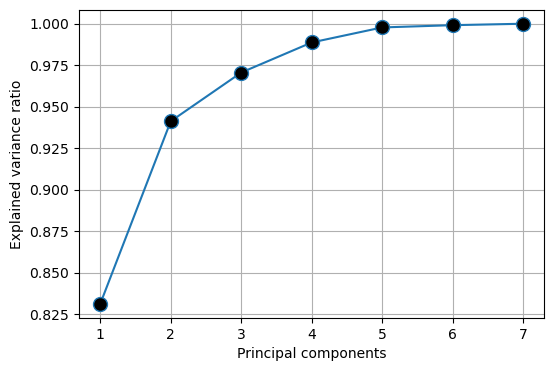

In [13]:
#Visualize the cumulative sum of the variance ratios

plt.figure(figsize = (6,4))
plt.plot(x, y.cumsum(), markersize = 10, marker = 'o', markerfacecolor = 'k')


plt.grid(True)
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio")

plt.show()

In [14]:
x_pca.components_

array([[ 0.35556829,  0.36301808,  0.31895394,  0.36605023,  0.14673302,
         0.45100347,  0.53021691],
       [-0.21781557, -0.07496443,  0.18358021, -0.01090513,  0.89088896,
         0.17297311, -0.29918766],
       [ 0.24526464,  0.38541318,  0.40381368,  0.36751312, -0.04431677,
        -0.51795232, -0.47215672],
       [ 0.65226324,  0.26833559, -0.2191367 , -0.56013488,  0.07848857,
         0.20864554, -0.30180008],
       [ 0.31885847, -0.17048141, -0.10824797, -0.13451528,  0.38362141,
        -0.65558048,  0.51234971],
       [-0.22208348,  0.10199069,  0.70892034, -0.62219238, -0.12891862,
        -0.06442158,  0.17267099],
       [ 0.43535469, -0.77626341,  0.37308797,  0.10887432, -0.11347443,
         0.14468134, -0.15173668]])

In [15]:
X.columns.values

array(['Band1', 'Band2', 'Band3', 'Band4', 'Band5', 'Band6', 'Band7'],
      dtype=object)

In [16]:
#Analyze the component loadings a bit

loadings = x_pca.components_
num_pc = x_pca.n_features_


pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))

loadings_df['Band'] = X.columns.values

loadings_df = loadings_df.set_index('Band')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Band,,,,,,,
Band1,0.355568,-0.217816,0.245265,0.652263,0.318858,-0.222083,0.435355
Band2,0.363018,-0.074964,0.385413,0.268336,-0.170481,0.101991,-0.776263
Band3,0.318954,0.183580,0.403814,-0.219137,-0.108248,0.708920,0.373088
Band4,0.366050,-0.010905,0.367513,-0.560135,-0.134515,-0.622192,0.108874
Band5,0.146733,0.890889,-0.044317,0.078489,0.383621,-0.128919,-0.113474
Band6,0.451003,0.172973,-0.517952,0.208646,-0.655580,-0.064422,0.144681
Band7,0.530217,-0.299188,-0.472157,-0.301800,0.512350,0.172671,-0.151737


In [17]:
#transform our dataset using the trained PCA mode
x_trans = pca.transform(X)
x_trans = pd.DataFrame(x_trans, columns = pc_list) 
x_trans

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.399501,-0.131322,0.160553,0.004921,-0.003382,-0.005334,0.011308
1,-0.571236,-0.086156,0.105579,0.028365,0.028741,-0.012095,-0.004085
2,-0.360513,0.175980,0.089031,0.015418,0.067473,0.006617,0.000455
3,-0.329155,0.232870,0.018701,0.001534,0.071591,0.004570,-0.011518
4,0.148892,0.163295,-0.002673,-0.036316,-0.022835,0.007263,-0.010359
...,...,...,...,...,...,...,...
48843,0.339922,0.007445,-0.010984,0.021159,-0.001677,-0.005246,0.005902
48844,0.449321,-0.040471,-0.025973,-0.011736,0.023693,0.000073,-0.001491
48845,0.307136,-0.117707,-0.080006,-0.012095,0.050636,0.010442,-0.011880
48846,0.263860,-0.124994,-0.048833,0.029594,0.039995,0.003791,-0.001225


In [18]:
pca_data = pd.concat([input_data[coord_names], x_trans], axis = 1)
pca_data

,Longitude,Latitude,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,27.564250,-25.105965,-0.399501,-0.131322,0.160553,0.004921,-0.003382,-0.005334,0.011308
1,27.564548,-25.105963,-0.571236,-0.086156,0.105579,0.028365,0.028741,-0.012095,-0.004085
2,27.564845,-25.105962,-0.360513,0.175980,0.089031,0.015418,0.067473,0.006617,0.000455
3,27.565143,-25.105961,-0.329155,0.232870,0.018701,0.001534,0.071591,0.004570,-0.011518
4,27.565440,-25.105960,0.148892,0.163295,-0.002673,-0.036316,-0.022835,0.007263,-0.010359
...,...,...,...,...,...,...,...,...,...
48843,27.647507,-25.151951,0.339922,0.007445,-0.010984,0.021159,-0.001677,-0.005246,0.005902
48844,27.647804,-25.151950,0.449321,-0.040471,-0.025973,-0.011736,0.023693,0.000073,-0.001491
48845,27.648102,-25.151949,0.307136,-0.117707,-0.080006,-0.012095,0.050636,0.010442,-0.011880
48846,27.648399,-25.151947,0.263860,-0.124994,-0.048833,0.029594,0.039995,0.003791,-0.001225


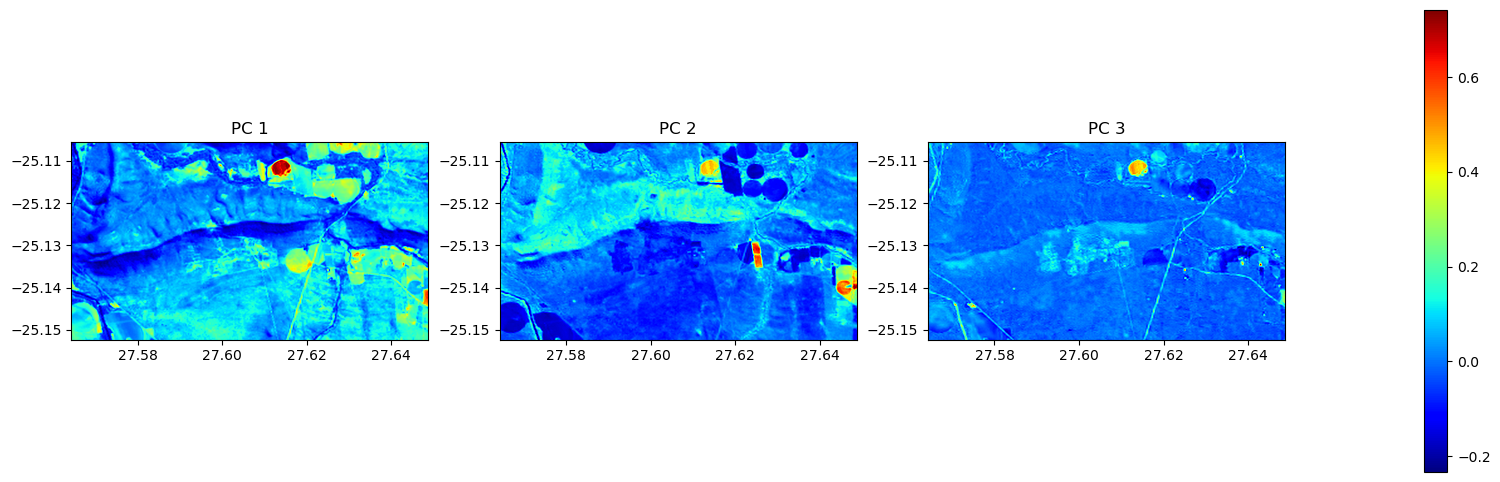

In [19]:
#Plot 3 Principal Components
xmin = input_data['Longitude'].min()
xmax = input_data['Longitude'].max()
ymin = input_data['Latitude'].min()
ymax = input_data['Latitude'].max()

# Plot 3 Principal Components
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, pc in enumerate(x_trans.columns[:3]):  
    map_matrix = pca_data[pc].values.reshape(size)
    
    vmin = np.min(map_matrix)
    vmax = np.max(map_matrix)

    im = axes[i].imshow(map_matrix, cmap="jet",  vmin=vmin, vmax=vmax,
                        extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
    
    axes[i].set_title(f'PC {i+1}')

fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.03, pad=0.1)
plt.show()


# k-Mean Clustering

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

#Original data clustering
kmeans_original = KMeans(n_clusters=4, random_state=42)  # Replace YOUR_SELECTED_K with your chosen number of clusters
original_clusters = kmeans_original.fit_predict(features)

#PCA-reduced data clustering
pca_data = x_trans.iloc[:, :3]  # Select the 3 principal components
kmeans_pca = KMeans(n_clusters=4, random_state=42)  # Replace YOUR_SELECTED_K
pca_clusters = kmeans_pca.fit_predict(pca_data)

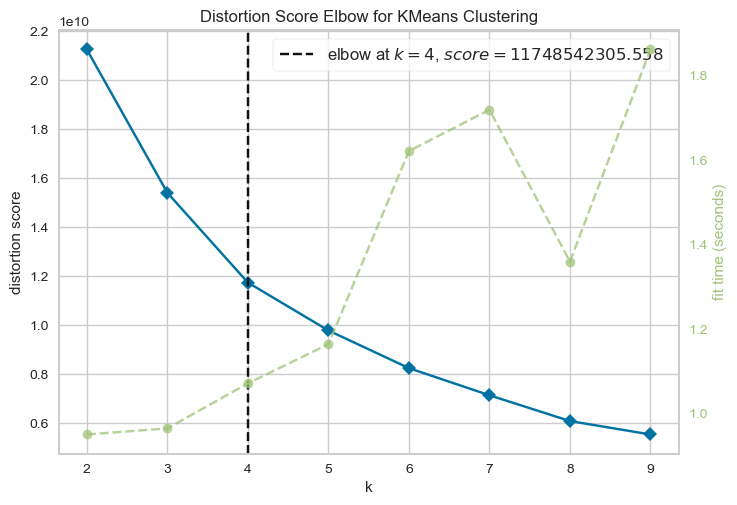

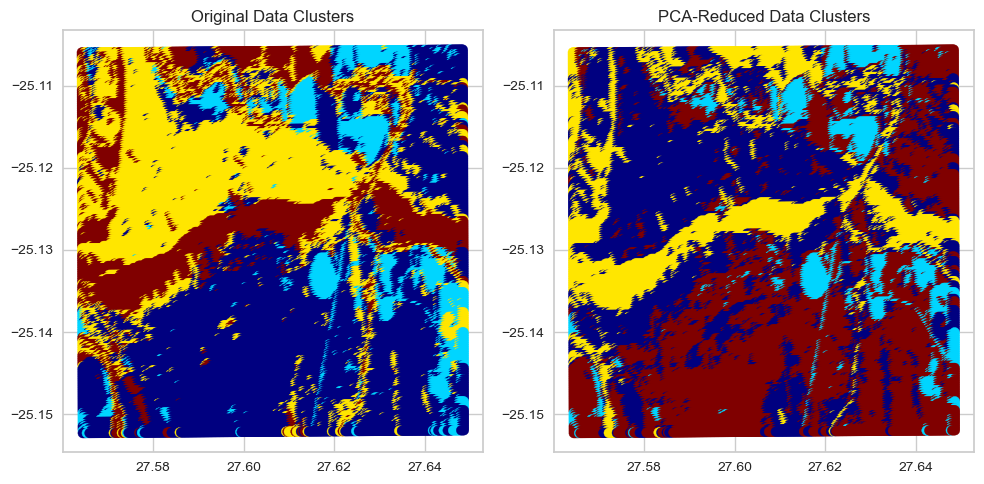

In [21]:
#Elbow method to choose optimal K for original data
visualizer = KElbowVisualizer(kmeans_original, k=(2, 10))  # Adjust the range of K as needed
visualizer.fit(features)
visualizer.show()

# Visualize clusters for original data
# (Assuming Latitude and Longitude are your spatial coordinates)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(input_data['Longitude'], input_data['Latitude'], c=original_clusters, cmap='jet')
plt.title('Original Data Clusters')

# Visualize clusters for PCA-reduced data
plt.subplot(1, 2, 2)
plt.scatter(input_data['Longitude'], input_data['Latitude'], c=pca_clusters, cmap='jet')
plt.title('PCA-Reduced Data Clusters')

plt.tight_layout()
plt.show()

The graph illustrates the elbow point in the distance score for KMeans clustering, representing the compactness of clusters by measuring the distance between points within a cluster. A lower distance score indicates a more compact cluster. The elbow point, where the distance score begins to sharply decrease, signifies the optimal number of clusters. In this instance, the elbow point occurs at K=4, indicating that four clusters are optimal. Identifying the elbow point can be challenging, especially when the distance score decreases gradually. 

When comparing the original data with PCA-reduced data reveals distinct characteristics in their clustering patterns. The original data clusters exhibit a more widespread and well-defined structure across the feature space, while the PCA-reduced data clusters are notably more compact and concentrated in lower dimensions, making the cluster structure harder to discern. Specifically, the original data clusters are larger, a consequence of PCA's dimensionality reduction, which enhances cluster compactness. Additionally, the original data clusters display a more even distribution across the feature space, contrasting with the concentrated nature of the reduced data clusters in lower dimensions. The diminished size, increased compactness, and decreased clarity of the cluster structure in PCA-reduced data highlight the significant impact of PCA on the clustering dynamics.

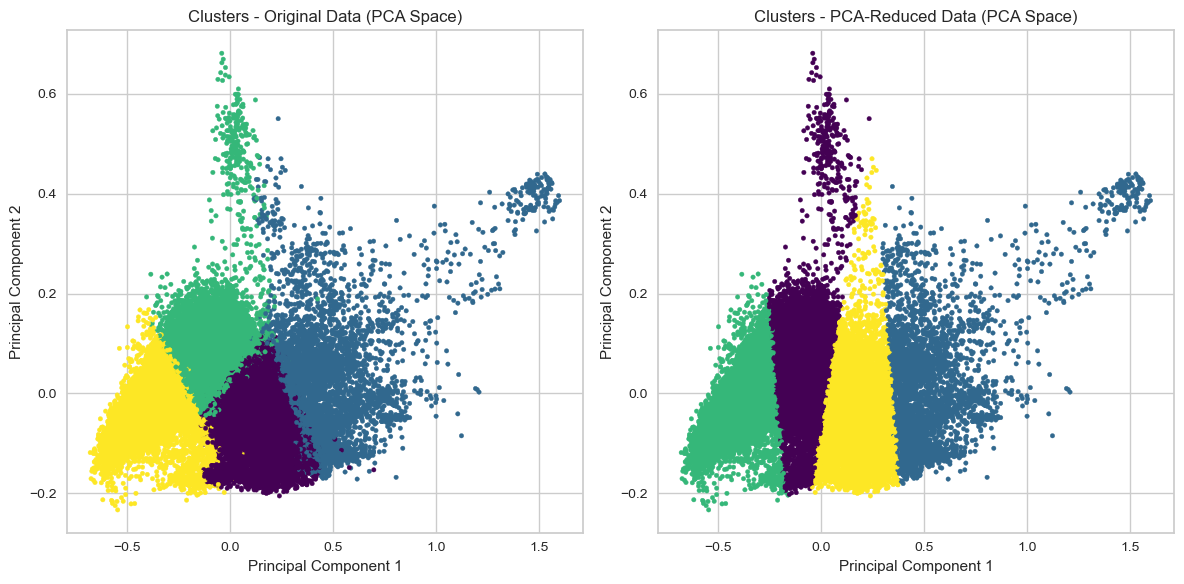

In [22]:
# Add cluster assignments for the original data
input_data['Original_Cluster'] = original_clusters

# Visualize clusters in the PCA space for the original data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_trans['PC1'], x_trans['PC2'], c=input_data['Original_Cluster'], cmap='viridis', s=10)
plt.title('Clusters - Original Data (PCA Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualize clusters in the PCA space for the PCA-reduced data
plt.subplot(1, 2, 2)
plt.scatter(x_trans['PC1'], x_trans['PC2'], c=pca_clusters, cmap='viridis', s=10)
plt.title('Clusters - PCA-Reduced Data (PCA Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In comparing the original data clusters with those from the PCA-reduced data, distinct differences emerge. The clusters in the original data exhibit a more widespread and well-defined structure throughout the feature space, while the clusters in the PCA-reduced data appear more compact and concentrated in the lower-dimensional space. Notably, the original data clusters are larger, reflecting the impact of PCA's dimensionality reduction, which tends to make clusters more compact. Moreover, the original data clusters demonstrate a more even distribution across the feature space, contributing to their well-defined structure, whereas the reduced data clusters show a higher concentration in the lower-dimensional space.